# 日本の株式銘柄データの取得：Stooq



## サンプルプログラムの実行

pandas_datareaderを使ってトヨタの株価を取得してみましょう。

東京証券取引所の株式データはstooq.comというポーランドの会社が提供しています。1日250回のアクセス制限があるので注意してください。

```
Open : 始値
High : 高値
Low : 安値
Close : 終値
Volume: 出来高
```
インディケータは銘柄コードの後ろに".JP"をつけたものです。  
例えば「イオン株式会社」の銘柄コードは8267ですから、インディケータは"8267.JP"となります。

In [1]:
import pandas_datareader.data as web

import datetime

#株価取得 8267はイオン株式会社の銘柄コードです。
df = web.DataReader('8267.JP', "stooq")
df = df.sort_index()
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-03,1852.0,1869.5,1842.0,1854.0,2285300
2019-06-04,1860.5,1881.0,1842.0,1849.5,2724900
2019-06-05,1880.0,1911.5,1869.0,1909.5,2521200
2019-06-06,1891.5,1901.0,1883.0,1896.0,1888100
2019-06-07,1891.0,1894.0,1876.0,1884.0,1646200


データを整形します。処理内容はTimeSeriesDataAnalysis1.ipynbと同じですので、そちらを参照してください。

In [2]:
from datetime import datetime
import matplotlib.dates as mdates

start = datetime(2019, 1, 1) # 開始日
end = datetime(2019, 3, 31) # 終了日

ohlc = df.loc[start:end, ['Open', 'High', 'Low', 'Close']] # 出来高以外の値をコピー

ohlc.index = mdates.date2num(ohlc.index) # indexをdatetime形式から数値に変換

data = ohlc.reset_index().values # DataFrameを二次元配列のリストに変換


ローソク足を描画してみましょう。

<IPython.core.display.Javascript object>


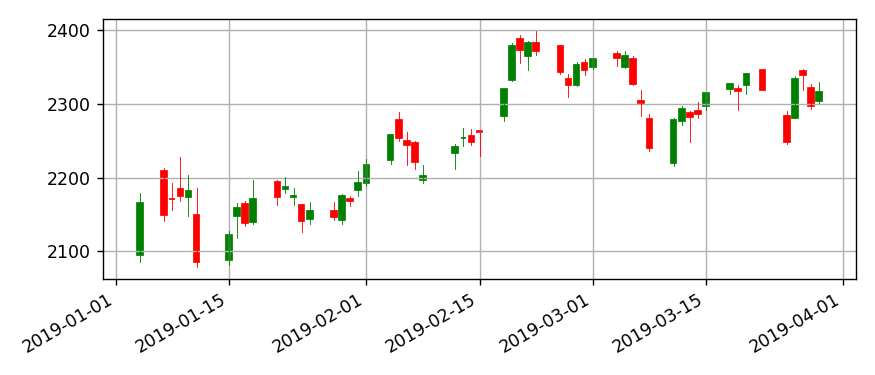

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import mpl_finance

fig = plt.figure(figsize=(7, 3)) # figure(図を配置する画面)のサイズを指定
ax = plt.subplot() # 図を描画する領域を準備

# mpl_financeのcandlestick_ohlc関数を使ってローソク足を描画
mpl_finance.candlestick_ohlc(ax, data, width=0.7, colorup='g', colordown='r')

ax.grid()  # グリッド表示を描画
locator = mdates.AutoDateLocator() # x軸の日付ラベルを自動調整する
#locator = mdates.MonthLocator() # x軸を月単位のラベルにする
#locator = mdates.YearLocator() # x軸を年単位のラベルにする
ax.xaxis.set_major_locator(locator) # X軸のメモリを設定
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator)) # X軸のメモリをdateフォーマットに変更

fig.autofmt_xdate() # X軸の日付ラベルが見やすくなるよう回転
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')# 軸を右揃えにして斜めに
fig.tight_layout() # 図がはみ出さないようにレイアウト
plt.savefig('fig/Stooq.png') # 図を画像として保存